In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import warnings
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

warnings.filterwarnings(action="ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/ransomware-detection-data-set/data_file.csv


In [2]:
# Preprocessing
# Open the datasets:
df = pd.read_csv("../input/ransomware-detection-data-set/data_file.csv")
# Delete the useless columns:
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
# Replace the value repeated: MD5HASH - DebugSize - MajorOSVersion - BitcoinAddresses - NumberOfSections - SizeOfStackReserve
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve", "MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
# Delete all the duplicated rows:
df.drop_duplicates(keep='last')
# Save the new datasets into a new csv file:
df.to_csv("df_clear.csv")


In [3]:
# Take a look at the data after processing
df = pd.read_csv("df_clear.csv")
df.head()

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
1,1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
2,2,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
3,3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
4,4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1


In [4]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          62485 non-null  int64
 1   Machine             62485 non-null  int64
 2   DebugSize           62485 non-null  int64
 3   DebugRVA            62485 non-null  int64
 4   MajorImageVersion   62485 non-null  int64
 5   MajorOSVersion      62485 non-null  int64
 6   ExportRVA           62485 non-null  int64
 7   ExportSize          62485 non-null  int64
 8   IatVRA              62485 non-null  int64
 9   MajorLinkerVersion  62485 non-null  int64
 10  MinorLinkerVersion  62485 non-null  int64
 11  NumberOfSections    62485 non-null  int64
 12  SizeOfStackReserve  62485 non-null  int64
 13  DllCharacteristics  62485 non-null  int64
 14  ResourceSize        62485 non-null  int64
 15  BitcoinAddresses    62485 non-null  int64
 16  Benign              62485 non-null  int6

In [5]:
# Transform into Lists:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [6]:
print("The features (Machine ... Bitcoin@) : ")
print(X)

The features (Machine ... Bitcoin@) : 
[[     1      0      0 ...  34112    672      0]
 [     4     11 121728 ...  16864   1024      0]
 [     1      0      0 ...  34112    672      0]
 ...
 [     1      0      0 ...      0   2364      0]
 [     1      0      0 ...      0 130296      0]
 [     1      0      0 ...      0   6912      0]]


In [7]:
print("Target vector (Benign) : ")
print(Y)

Target vector (Benign) : 
[1 1 1 ... 0 0 0]


In [8]:
# Generate SVM data
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=0)


In [9]:
# Split data into training and testing sets
# 20% testing and 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Random state if we split for several times, it won't change:
# 80% of 1 and 20% if re-split may stay the same

In [10]:
# Create a Support Vector Machine (SVM) Classifier
svm = SVC(kernel='rbf', random_state=0)

In [11]:
# Fit the SVM Classifier to the training data
svm.fit(X_train, y_train)

SVC(random_state=0)

In [12]:
# Predict the classes of the testing set using SVM
y_pred = svm.predict(X_test)

In [13]:
# Print the accuracy of the model
print("Accuracy:", svm.score(X_test, y_test))

Accuracy: 0.955


Confusion Matrix for for support vector machine:
[[93  5]
 [ 4 98]]


<Figure size 640x480 with 0 Axes>

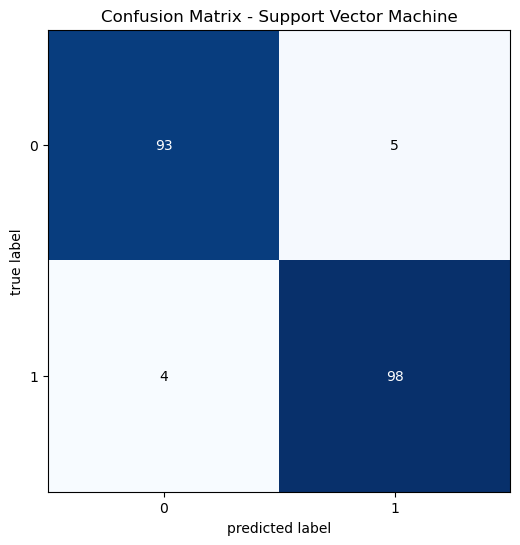

In [14]:
# Confusion matrix and analysis for Artificial Neural Network
cm_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for for support vector machine:")
print(cm_svm)
plt.figure()
plot_confusion_matrix(cm_svm, figsize=(8, 6))
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [15]:
# Additional analysis
print("Classification Report - Support Vector Machine:")
print(classification_report(y_test, y_pred))

Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        98
           1       0.95      0.96      0.96       102

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# Precision, Recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report - Random Forest:")
print(class_report)

Precision: 0.9514563106796117
Recall: 0.9607843137254902
F1 Score: 0.9560975609756097
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        98
           1       0.95      0.96      0.96       102

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

